In [ ]:
import os
import glob
from IPython.display import Image,display
from IPython import display
# display.clear_ouptut()
!nvidia-smi

Mon Sep 25 04:22:38 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
home=os.getcwd()
print(home)

/content


In [ ]:
!pip install ultralytics

Checking ultralytics installed or not

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.186 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


Getting data from roboflow

In [ ]:
%mkdir IFP

In [ ]:
%cd /content/drive/MyDrive/IFP

/content/drive/MyDrive/IFP


In [ ]:
!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="c1kgDFjWWVIH693OKbZ7")
project = rf.workspace("yolov7-n1bli").project("foreign-object-debris-detection")
dataset = project.version(1).download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.0.76
    Uninstalling opencv-python-headless-4.8.0.76:
      Successfully uninstalled 

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.186, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to Foreign-Object-Debris-Detection-1 in yolov8:: 100%|██████████| 60/60 [00:00<00:00, 230.68it/s]


Training the yolov8 model

In [ ]:
!yolo task=detect mode=train model=yolov8l.pt data=/content/drive/MyDrive/IFP/Foreign-Object-Debris-Detection-1/data.yaml epochs=70 imgsz=640

100% 83.7M/83.7M [00:01<00:00, 53.3MB/s]
Ultralytics YOLOv8.0.186 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/drive/MyDrive/IFP/Foreign-Object-Debris-Detection-1/data.yaml, epochs=70, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False,

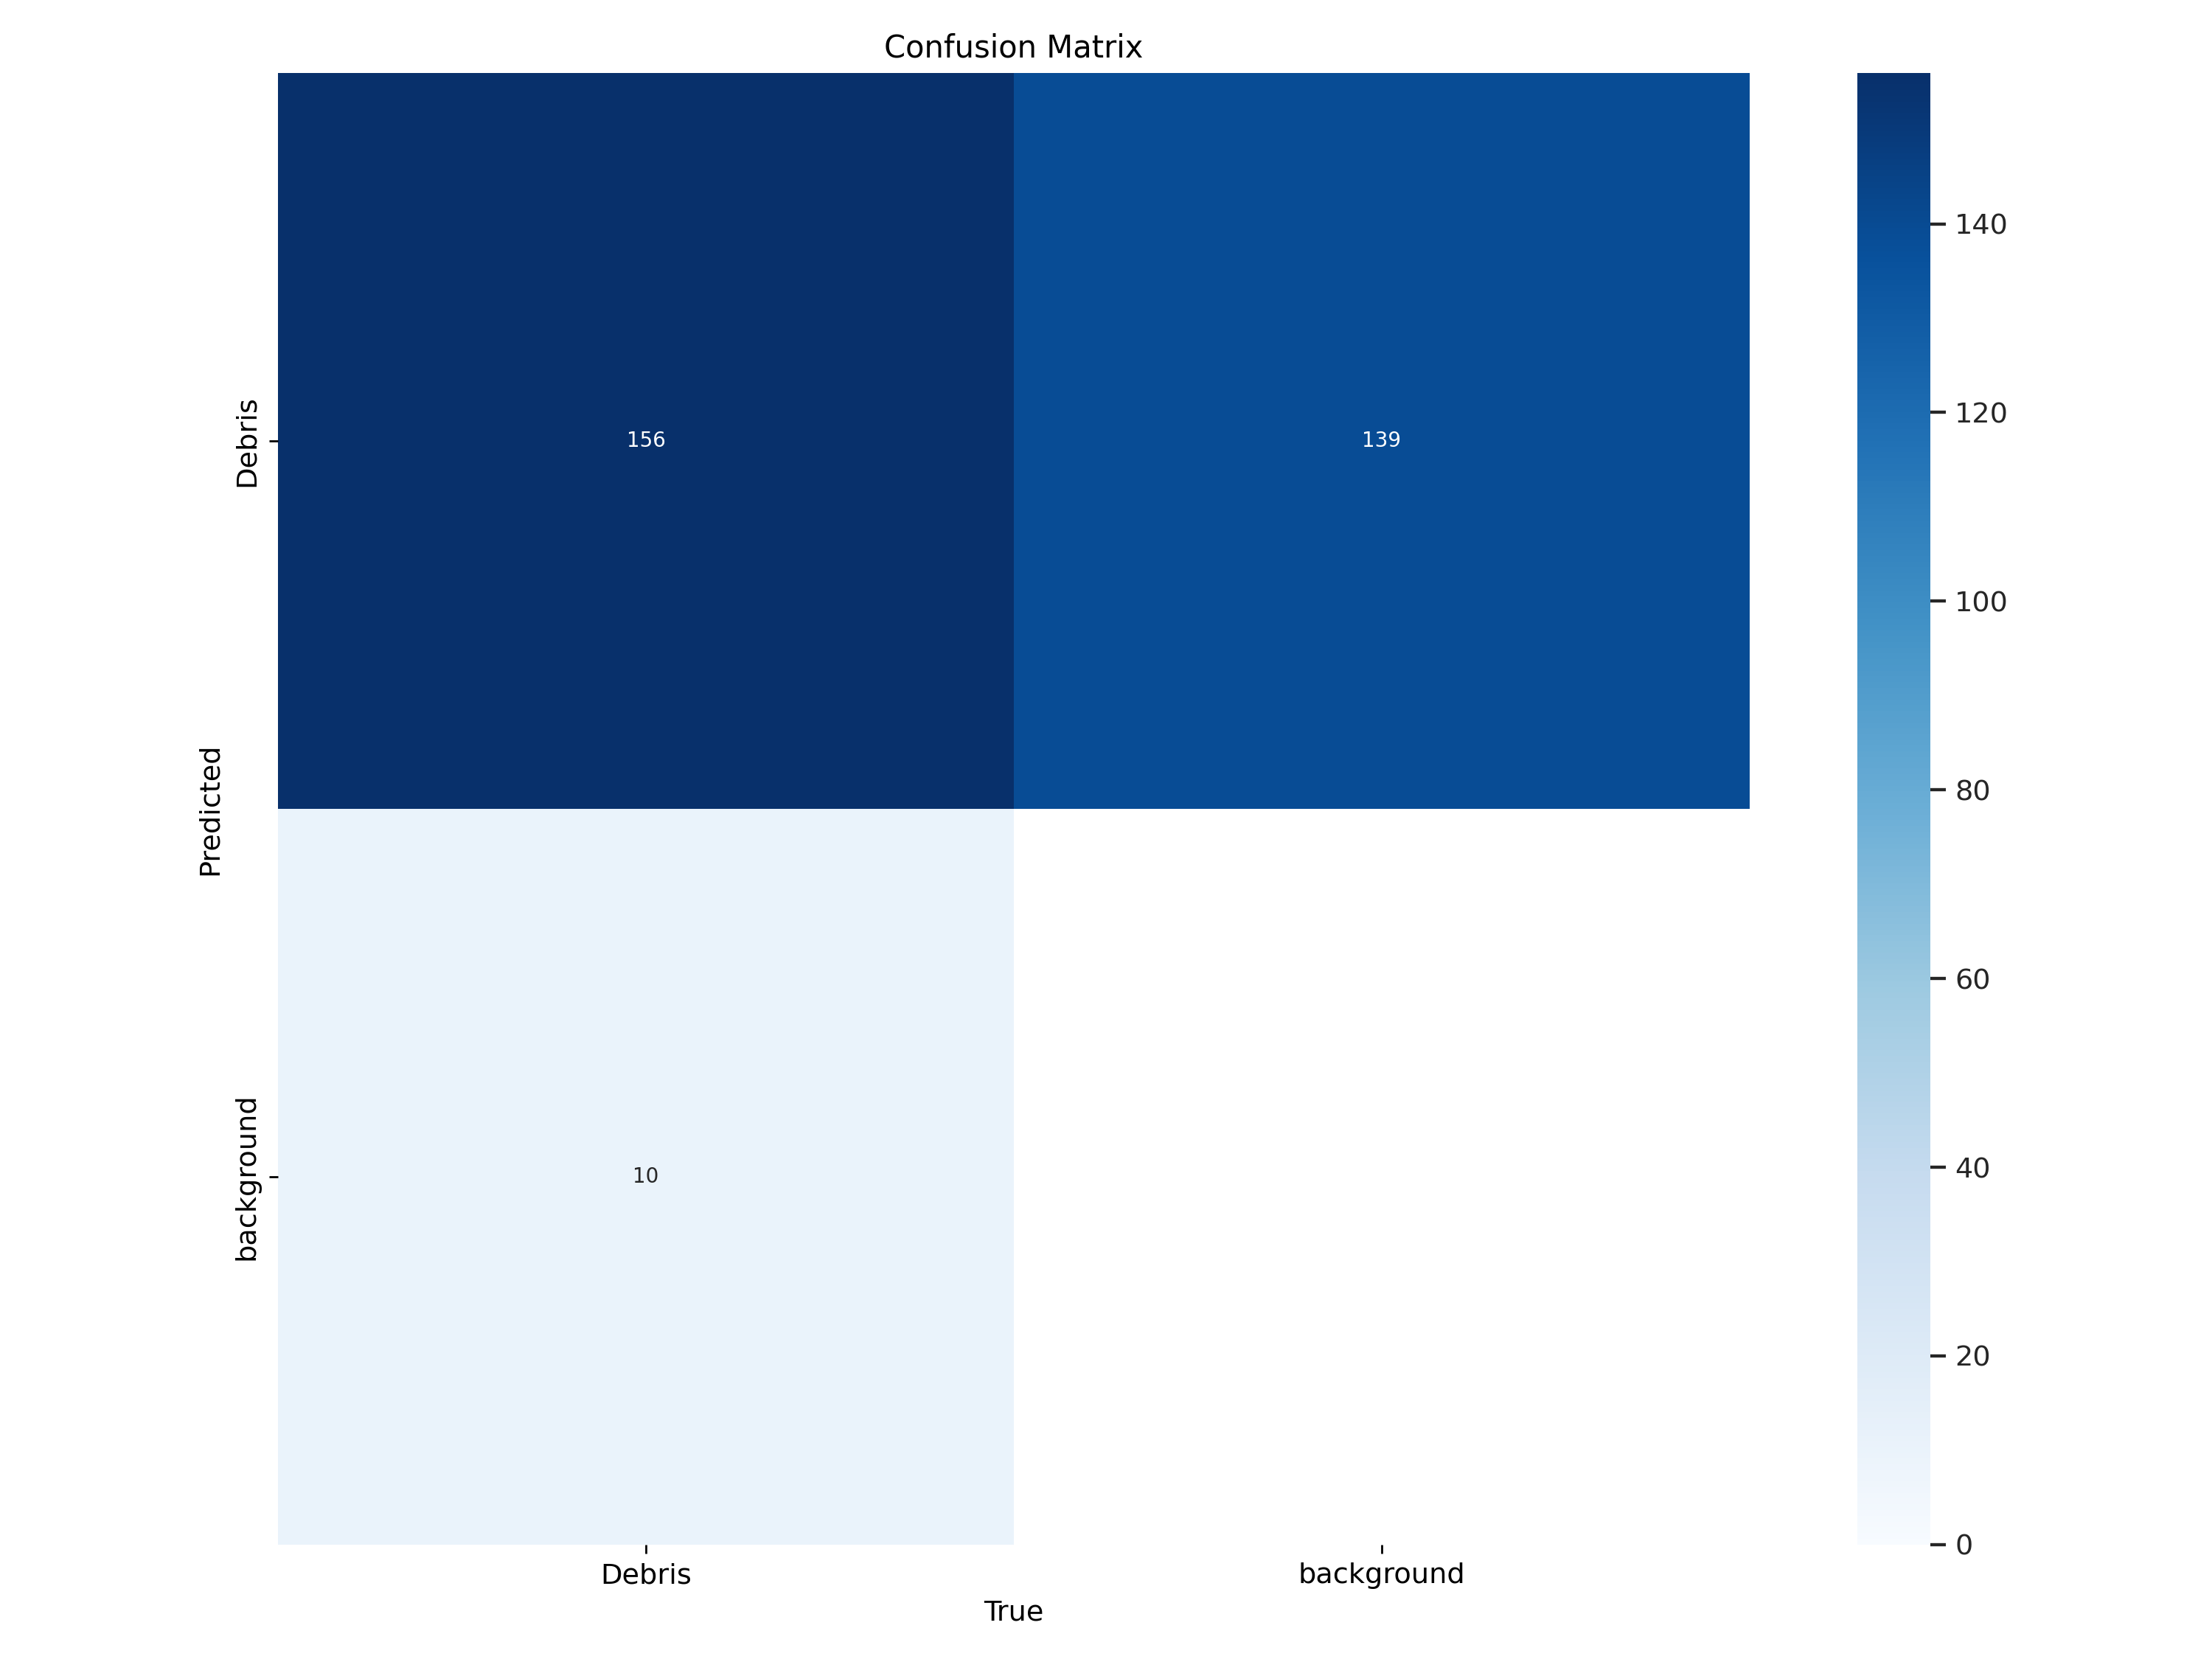

In [ ]:
Image(filename=f'/content/drive/MyDrive/IFP/runs/detect/train/confusion_matrix.png',width=800)

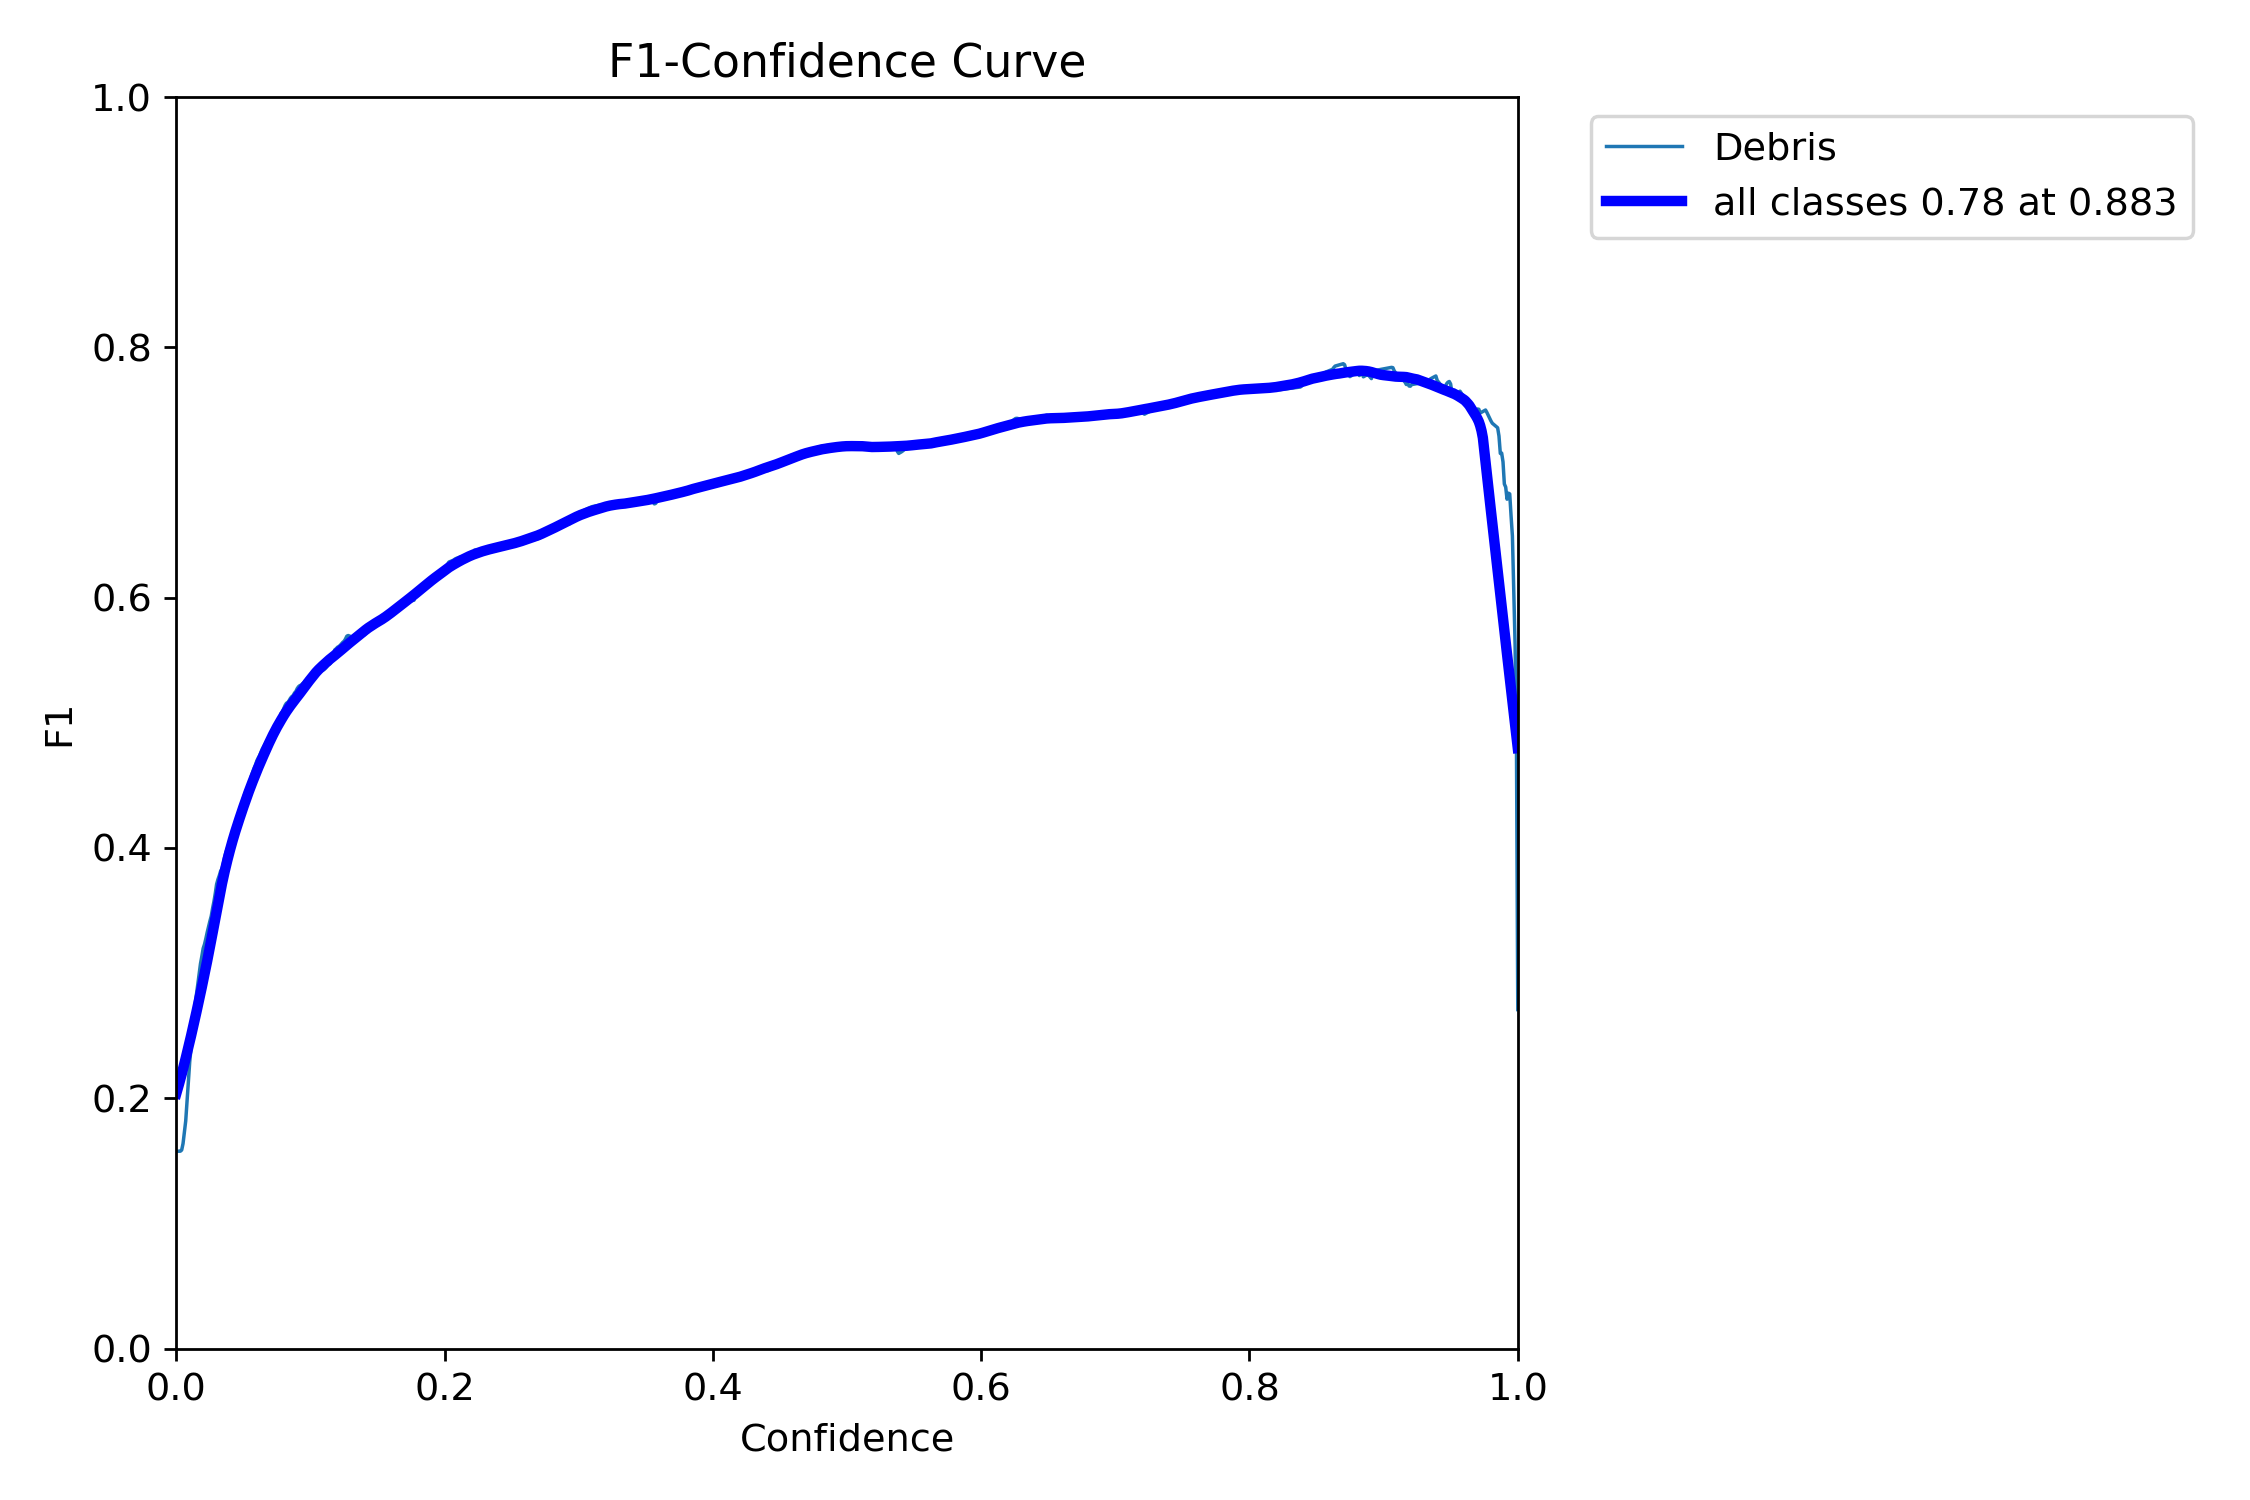

In [ ]:
Image(filename=f'/content/drive/MyDrive/IFP/runs/detect/train/F1_curve.png',width=800)

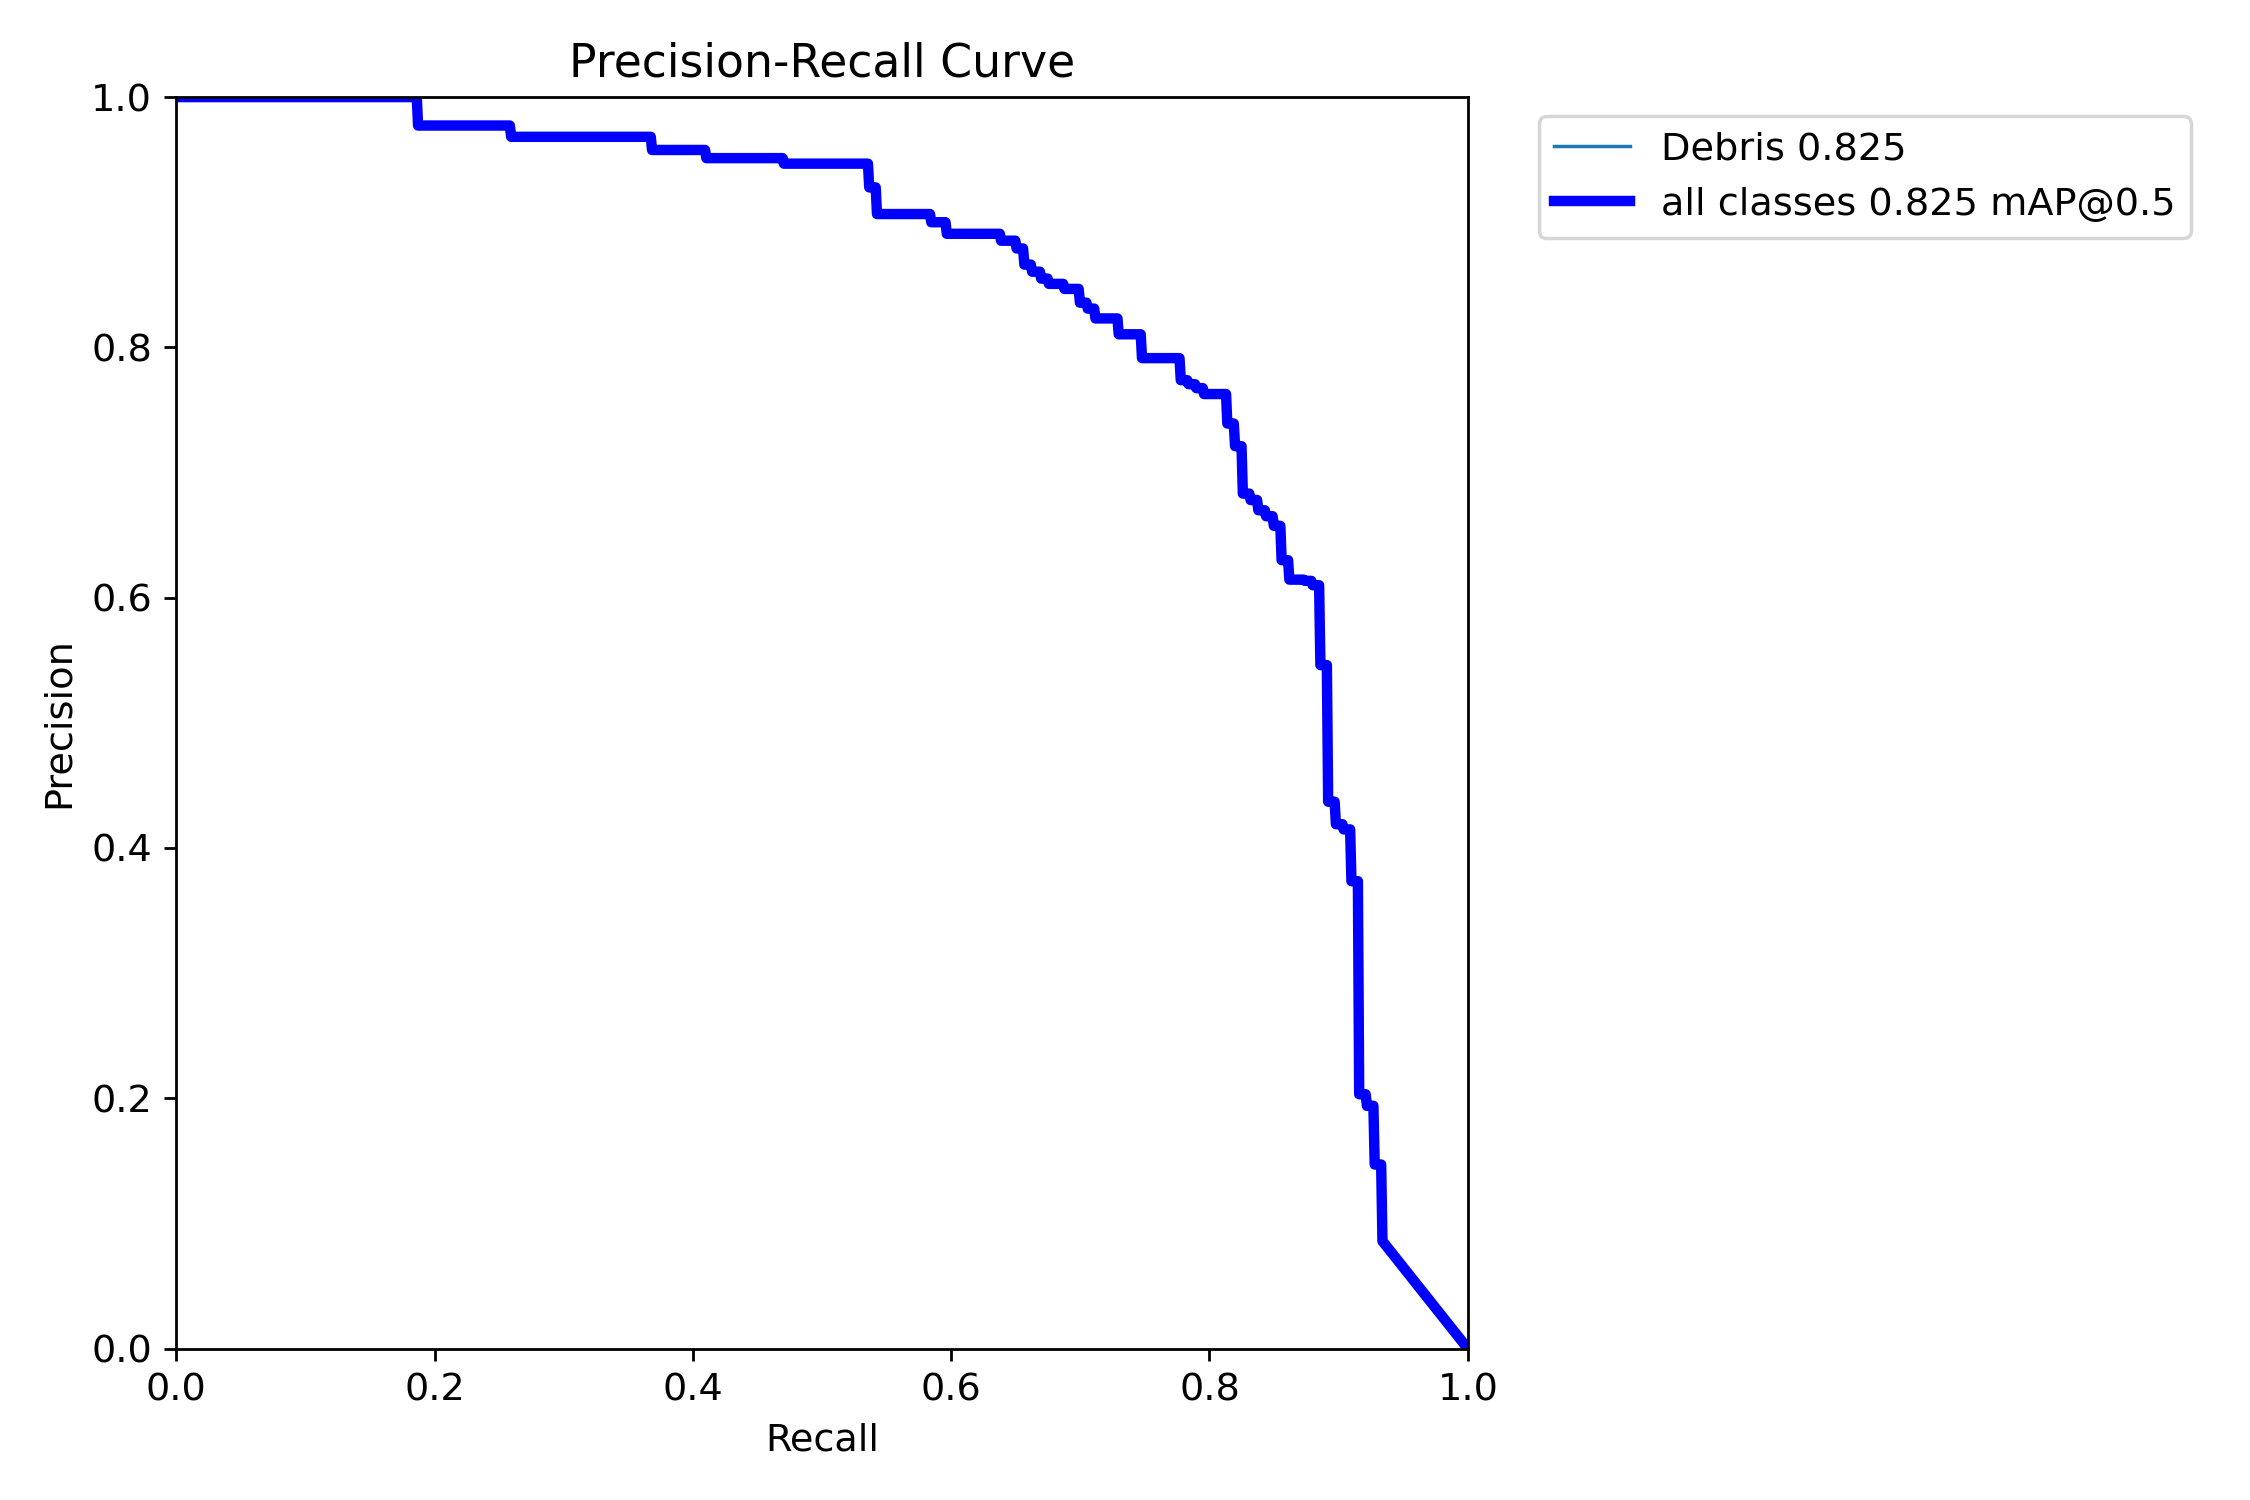

In [ ]:
Image(filename=f'/content/drive/MyDrive/IFP/runs/detect/train/PR_curve.png',width=800)

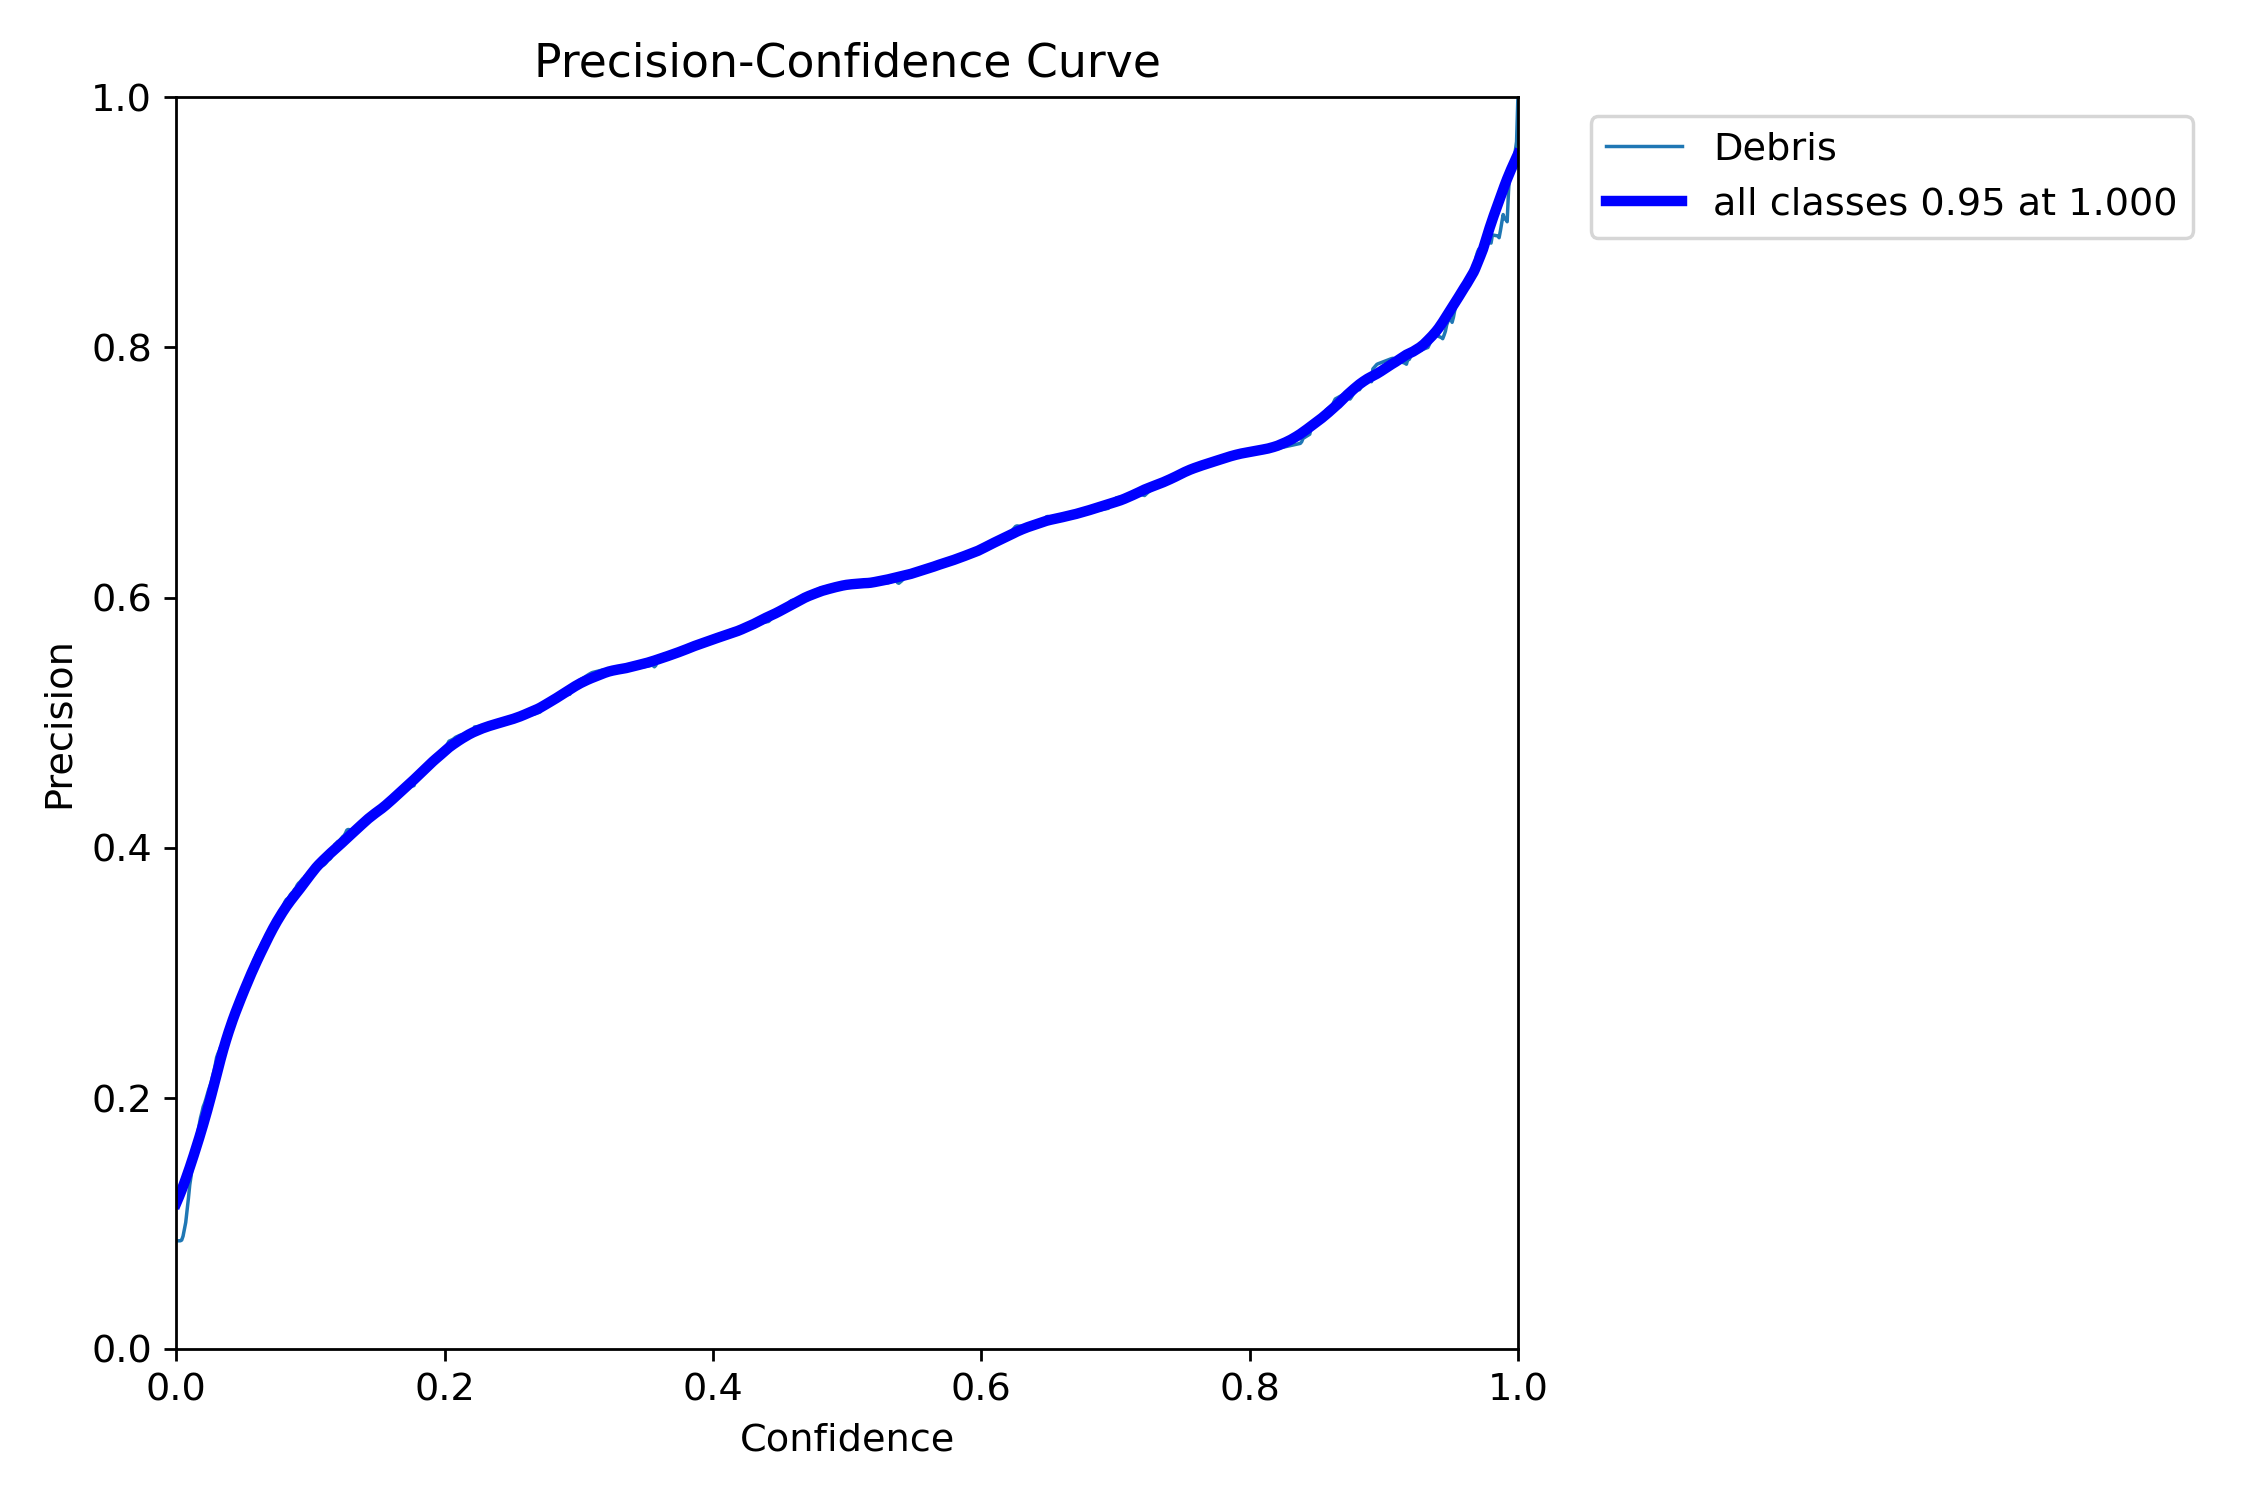

In [ ]:
Image(filename=f'/content/drive/MyDrive/IFP/runs/detect/train/P_curve.png',width=800)

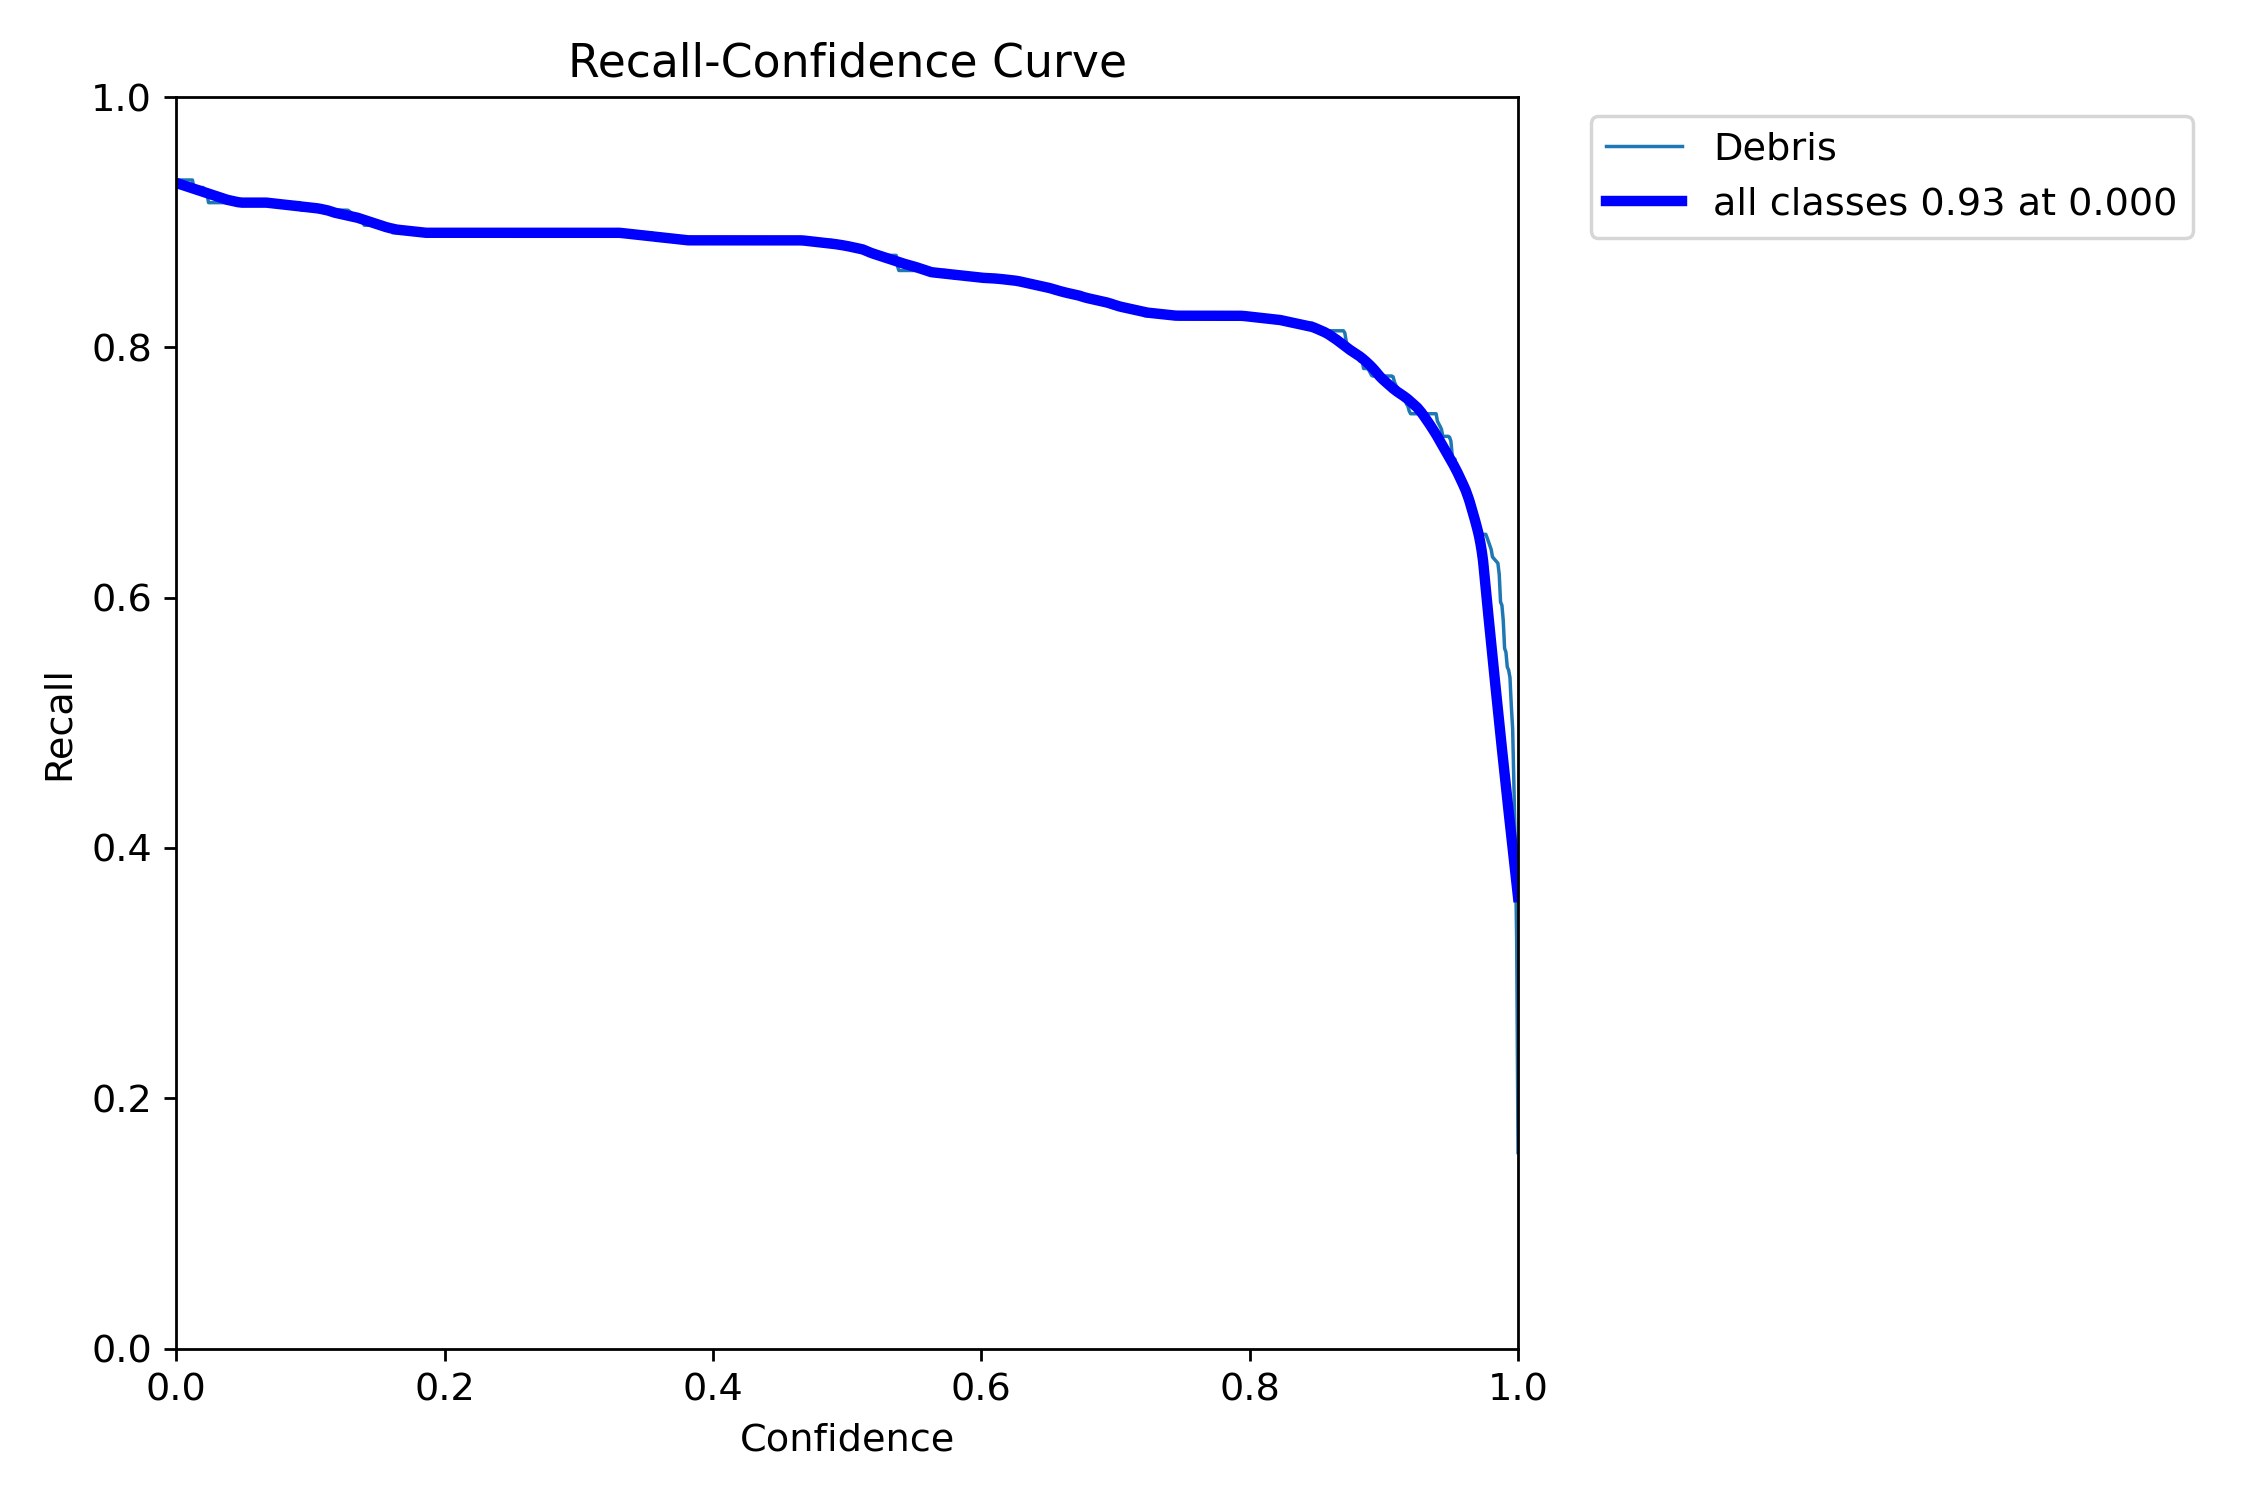

In [ ]:
Image(filename=f'/content/drive/MyDrive/IFP/runs/detect/train/R_curve.png',width=800)

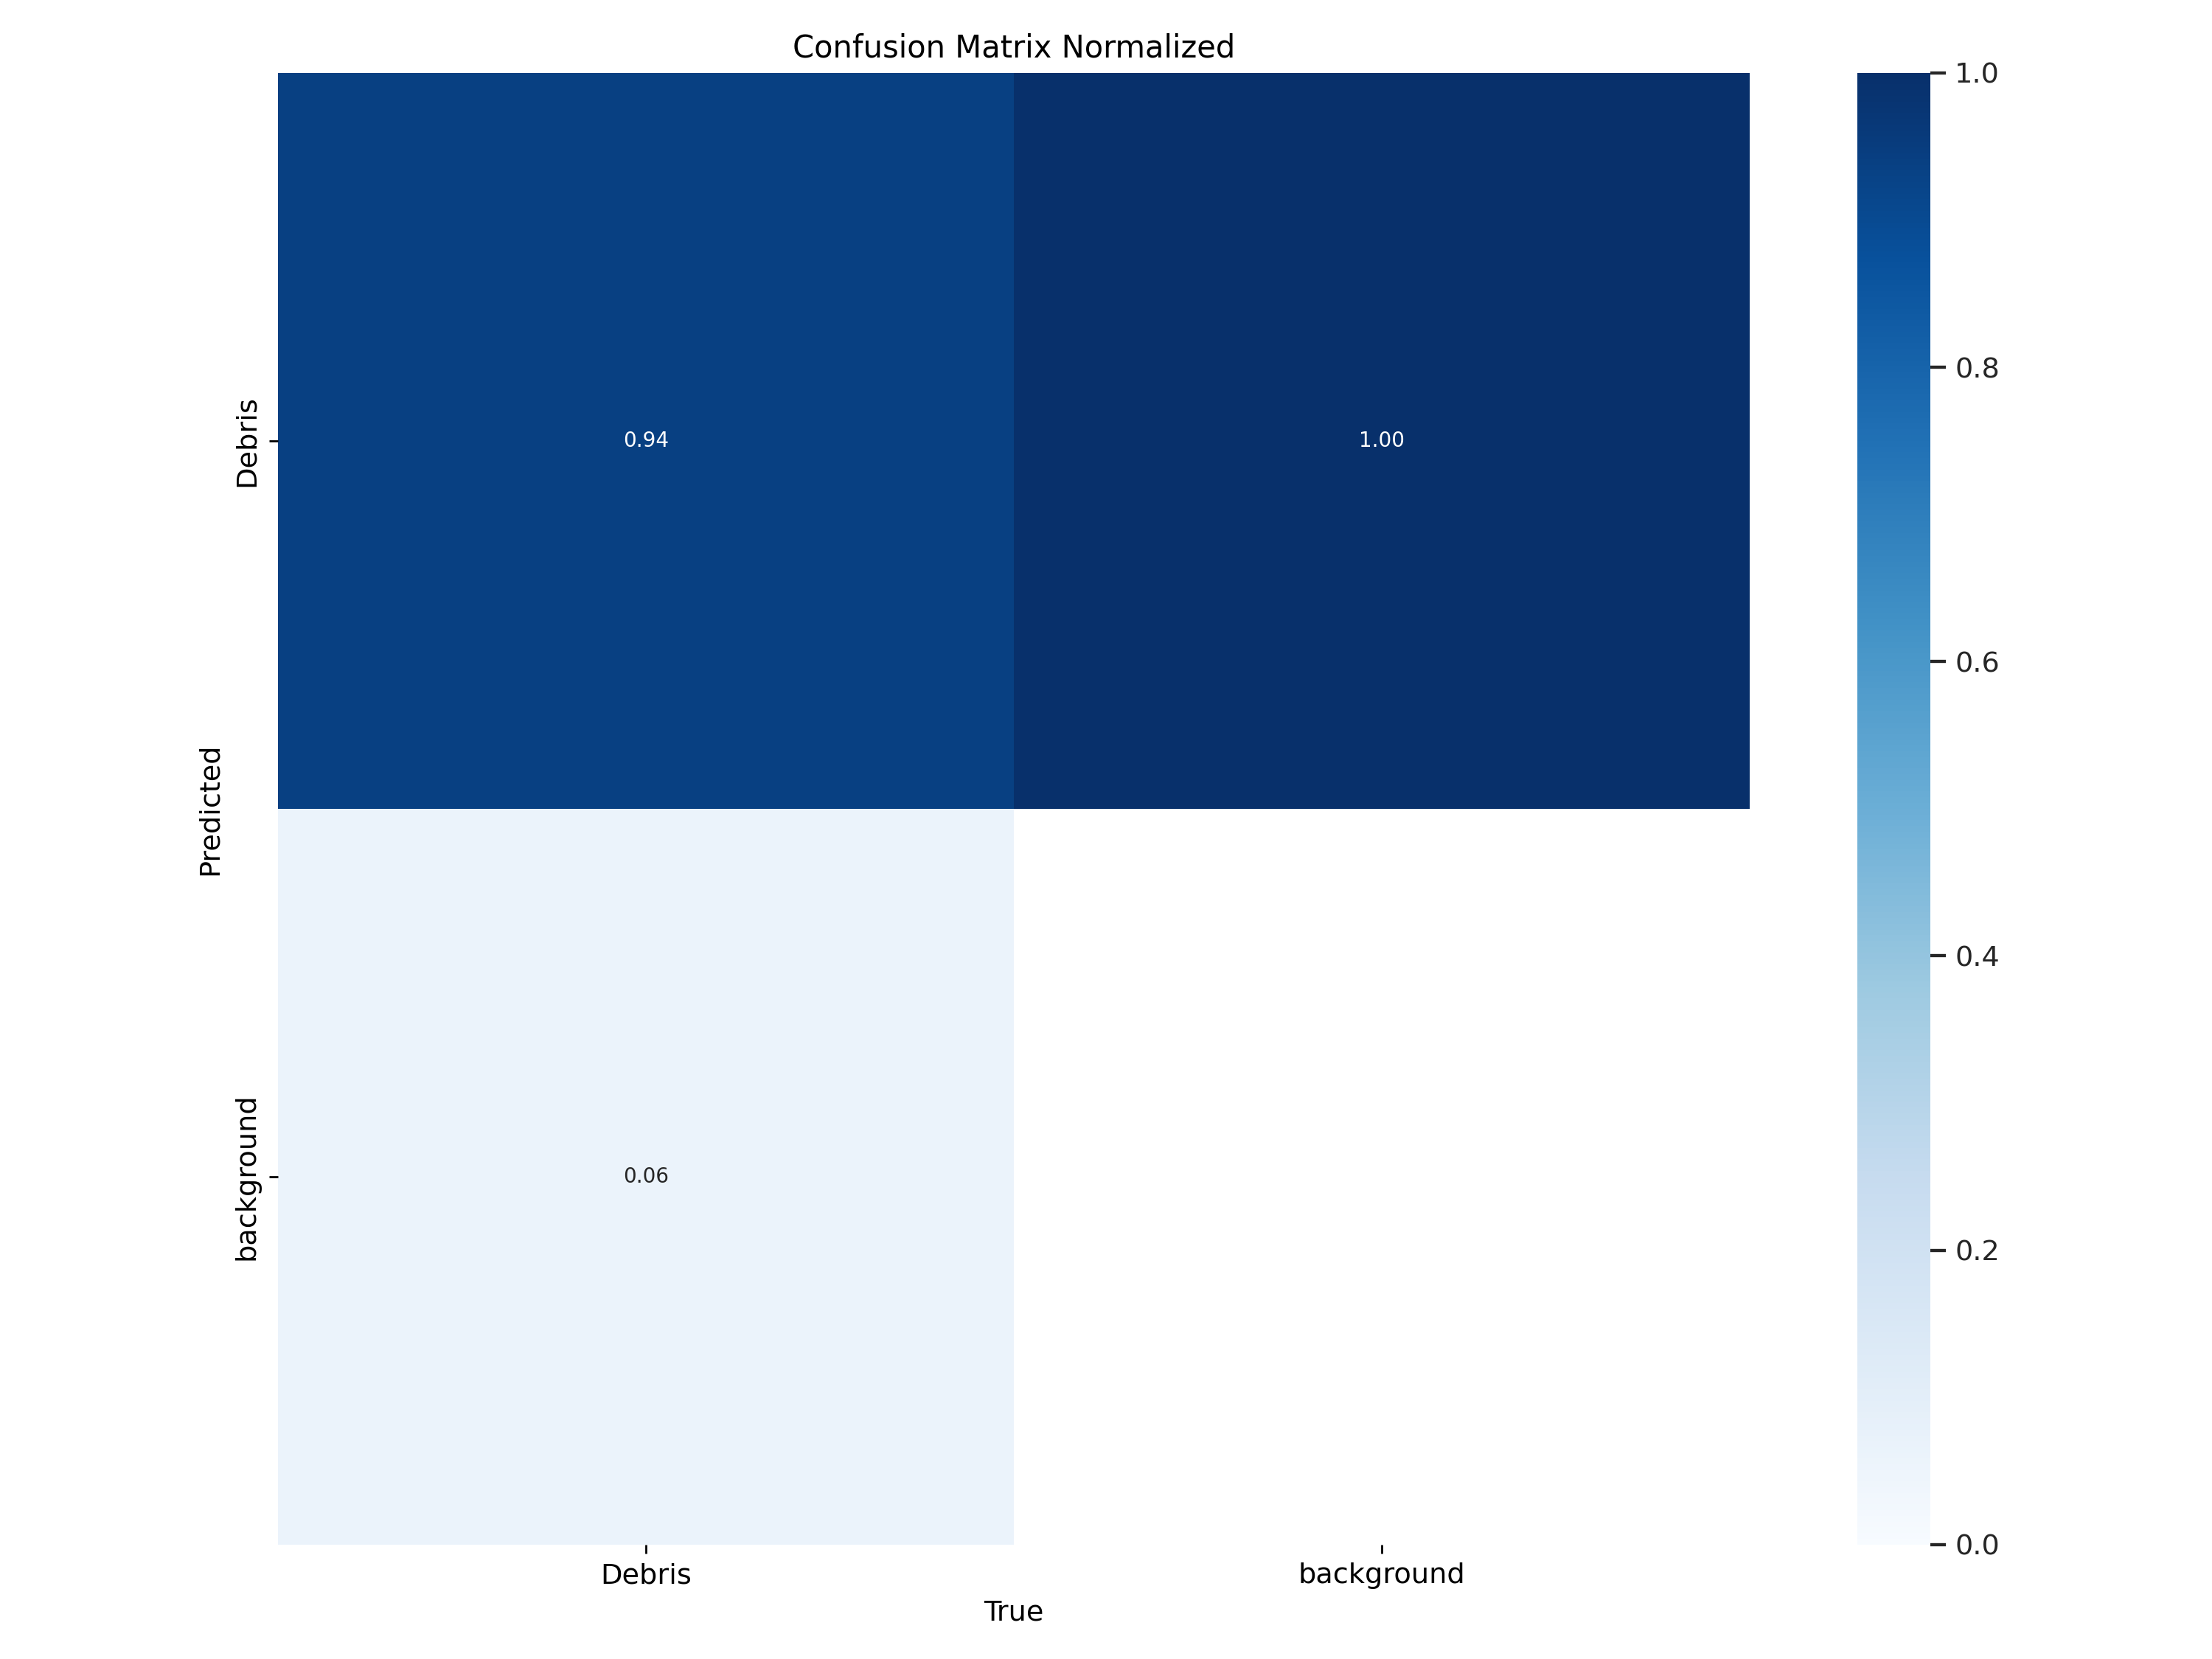

In [ ]:
Image(filename=f'/content/drive/MyDrive/IFP/runs/detect/train/confusion_matrix_normalized.png',width=800)

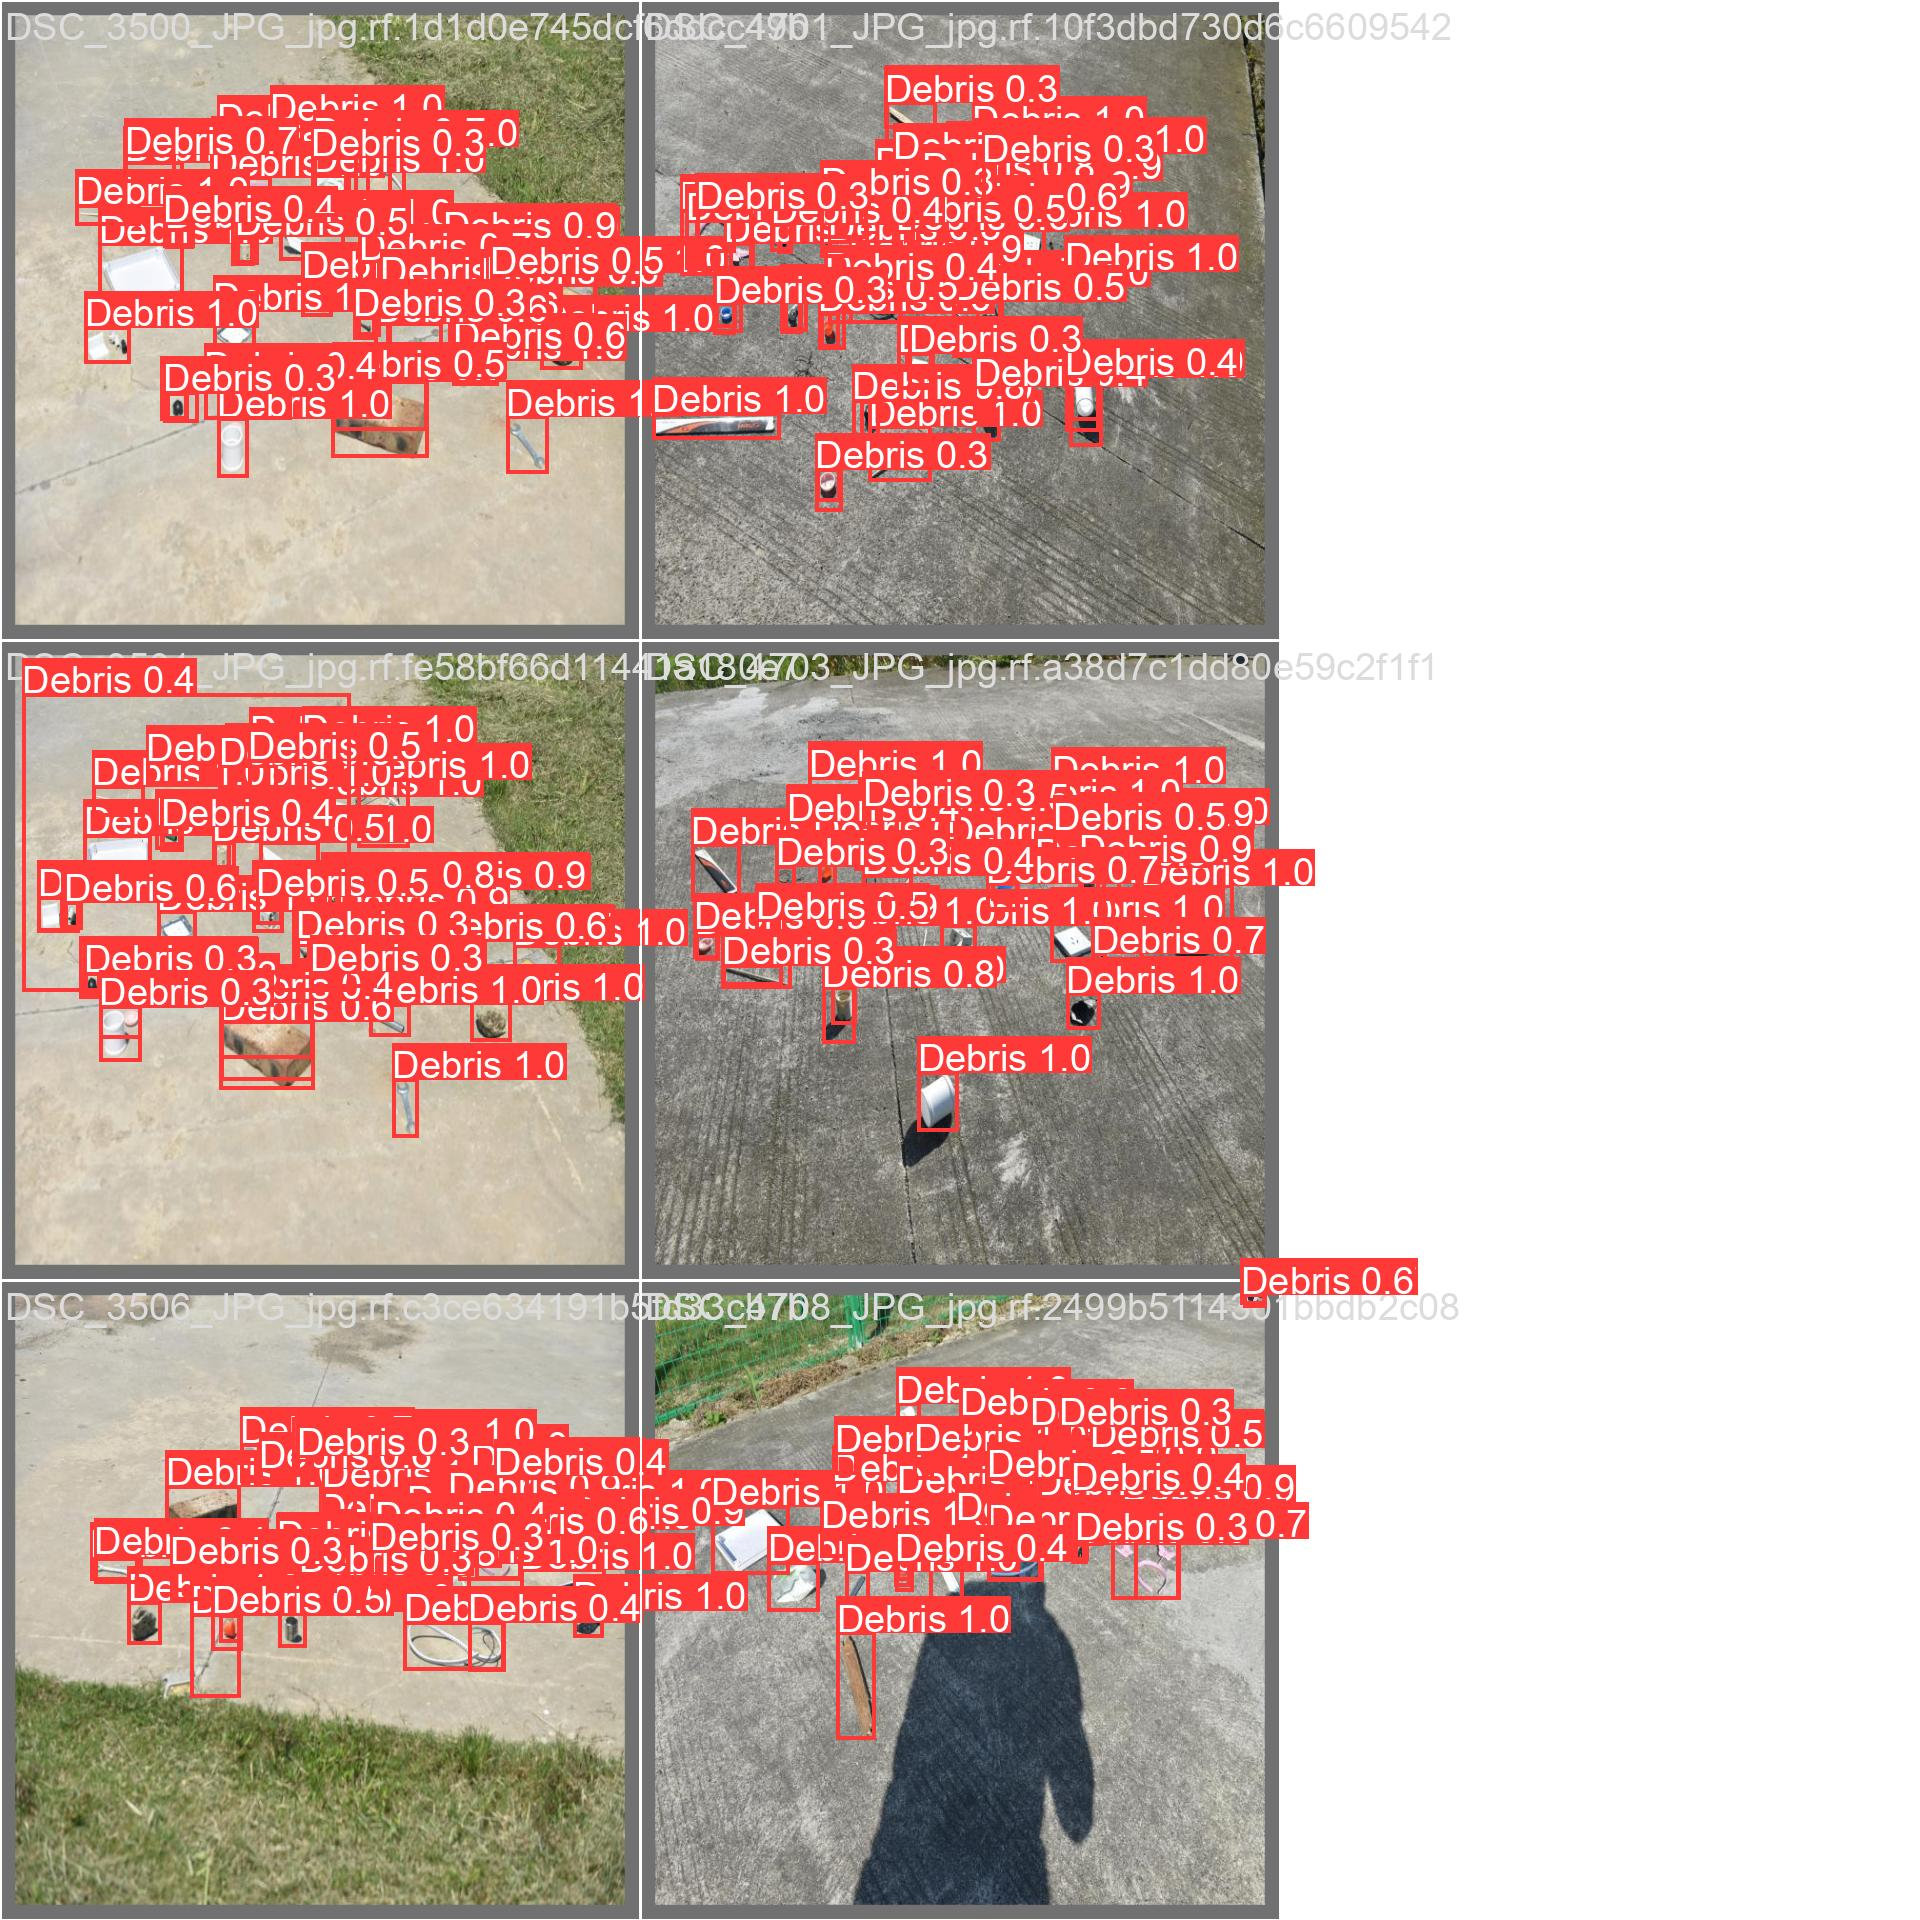

In [ ]:
Image(filename=f'/content/drive/MyDrive/IFP/runs/detect/train/val_batch0_pred.jpg',width=800)

In [ ]:
!yolo task=detect mode=val model=/content/drive/MyDrive/IFP/runs/detect/train/weights/best.pt data=/content/drive/MyDrive/IFP/Foreign-Object-Debris-Detection-1/data.yaml

Ultralytics YOLOv8.0.186 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/IFP/Foreign-Object-Debris-Detection-1/valid/labels.cache... 6 images, 0 backgrounds, 0 corrupt: 100% 6/6 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.86it/s]
                   all          6        166      0.783      0.783      0.839      0.326
Speed: 0.3ms preprocess, 50.0ms inference, 0.0ms loss, 24.3ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


Testing the images

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/IFP/runs/detect/train/weights/best.pt conf=0.35 source=/content/drive/MyDrive/IFP/Foreign-Object-Debris-Detection-1/test/images

Ultralytics YOLOv8.0.186 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients

image 1/2 /content/drive/MyDrive/IFP/Foreign-Object-Debris-Detection-1/test/images/DSC_3498_JPG_jpg.rf.ba3c83d197596d6cf5182cb6d8c9d75b.jpg: 640x640 45 Debriss, 62.9ms
image 2/2 /content/drive/MyDrive/IFP/Foreign-Object-Debris-Detection-1/test/images/DSC_3503_JPG_jpg.rf.997f79639b31dfd38dfcb67d6216cb8f.jpg: 640x640 39 Debriss, 63.0ms
Speed: 1.8ms preprocess, 63.0ms inference, 47.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


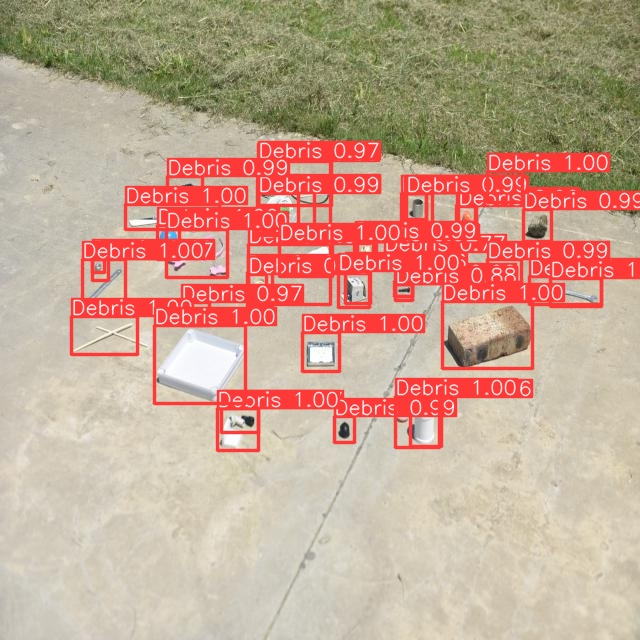

In [ ]:
Image(filename=f'/content/drive/MyDrive/IFP/runs/detect/predict2/DSC_3498_JPG_jpg.rf.ba3c83d197596d6cf5182cb6d8c9d75b.jpg',width=800)